In [1]:
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt

In [2]:
def gen_data_dict(file_path):
    with gzip.open(file_path, 'rt') as file:
        df = pd.read_csv(file)

    _dict = tuple(df.groupby('sequenceID'))
    return _dict

In [3]:
def plot_section(low_target, high_target, feature):
        plt.plot([low_target, high_target], [feature, feature], color='blue', marker='o')

def plot_feature_targets(feature, low_target, high_target, feature_name):

    # Plotting each section
    for i in range(len(low_target)):
        plot_section(low_target[i], high_target[i], feature[i])

    # Adding labels and title
    plt.xlabel('Log(Lambda)')
    plt.ylabel('Feature')
    plt.title(f'Feature: {feature_name}')

    # Show the plot
    plt.show()

In [4]:
seqs   = gen_data_dict('sequence_label_data/signals.gz')
labels = gen_data_dict('sequence_label_data/labels.gz')

In [5]:
seq_feature_df = pd.read_csv('learning_data/seq_features.csv')
target_df      = pd.read_csv('learning_data/target_lambda_bothfold.csv')

In [6]:
low  = target_df[target_df['big_end'] < 6]['small_end'].to_numpy()
high = target_df[target_df['big_end'] < 6]['big_end'].to_numpy()

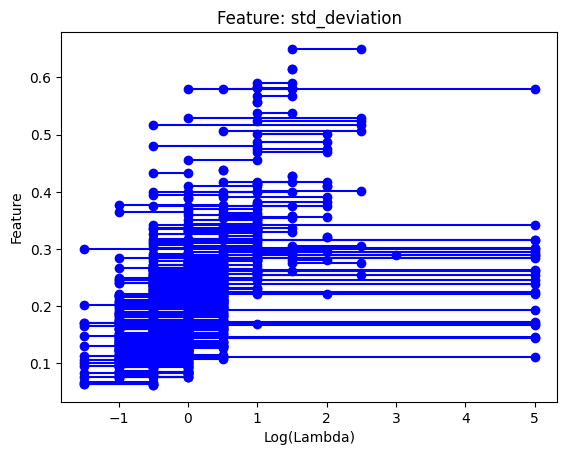

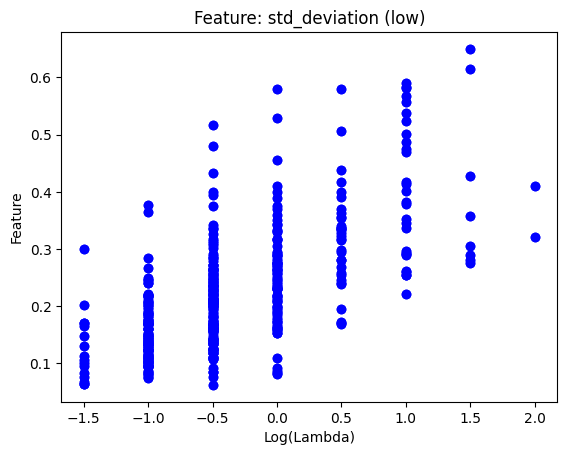

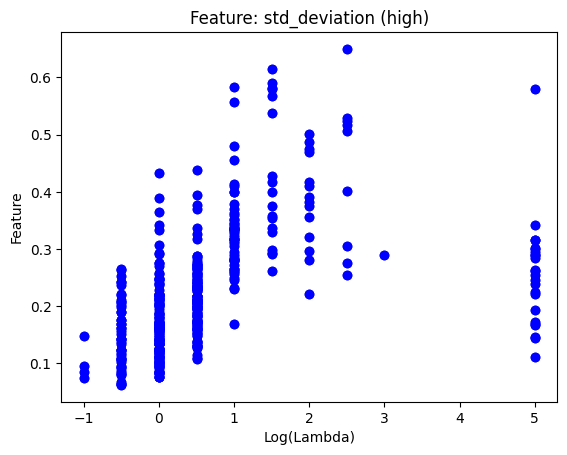

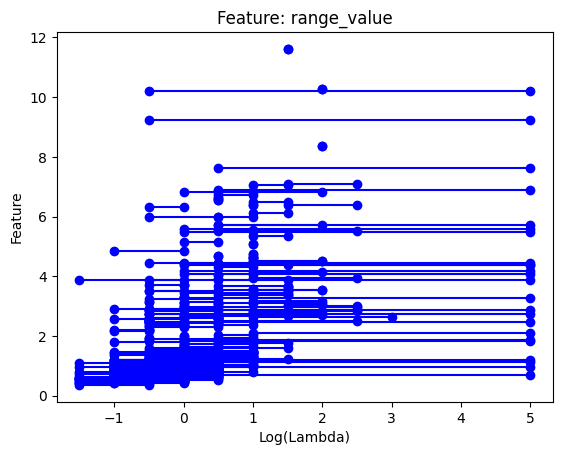

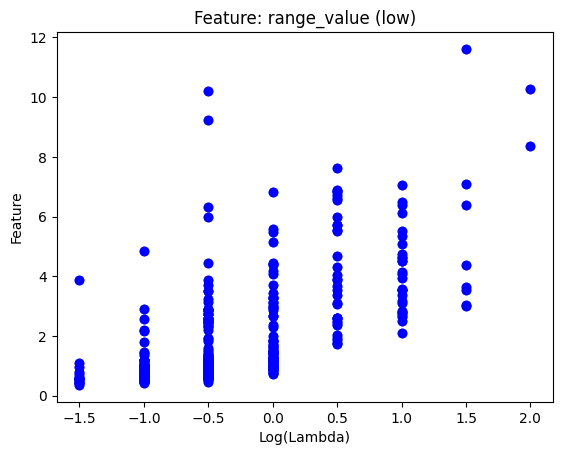

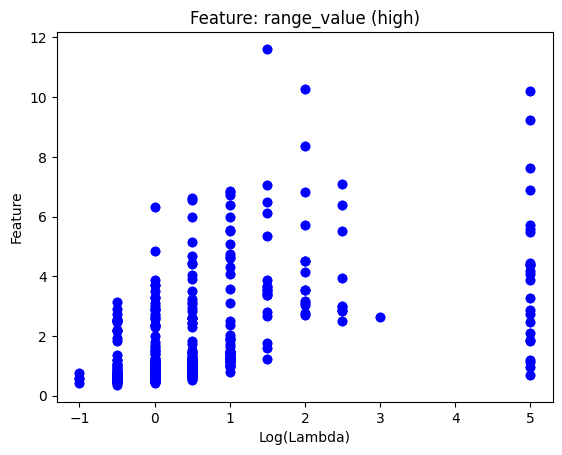

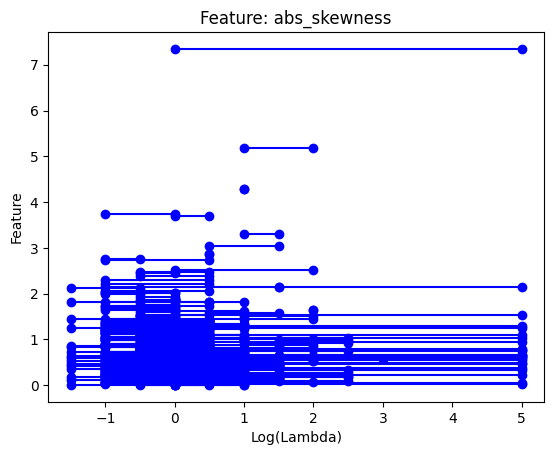

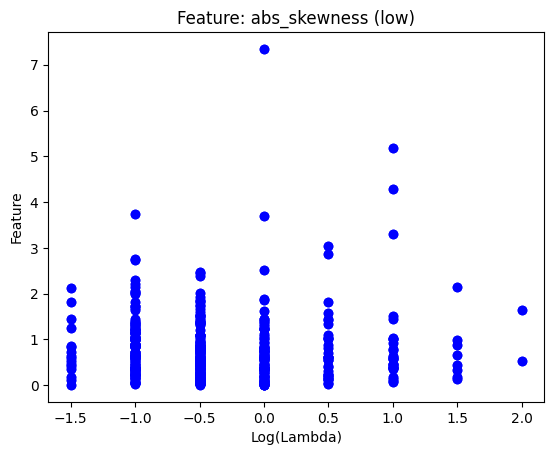

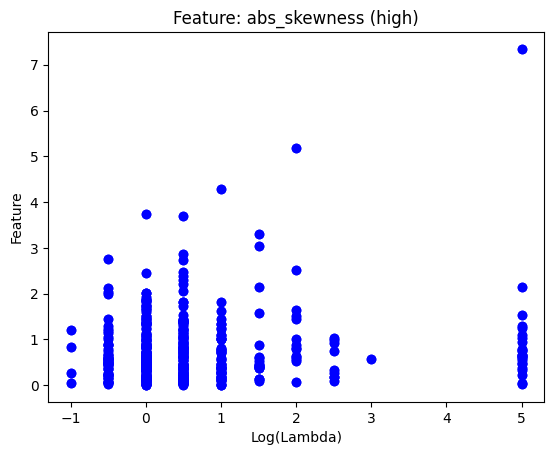

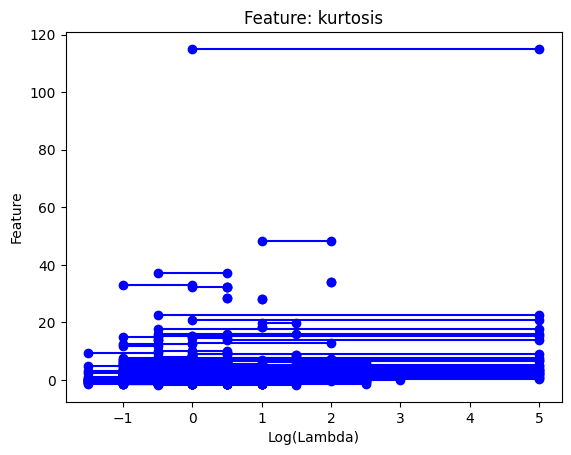

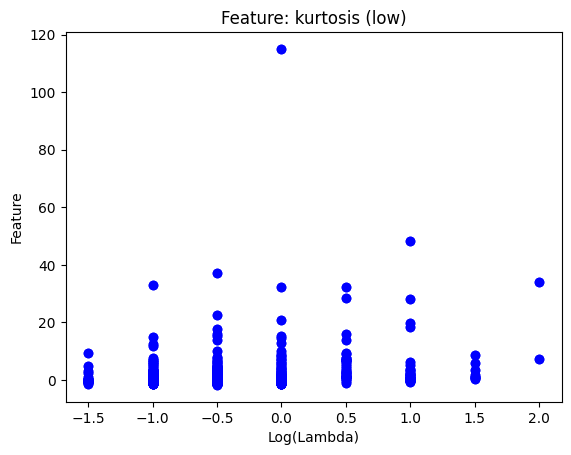

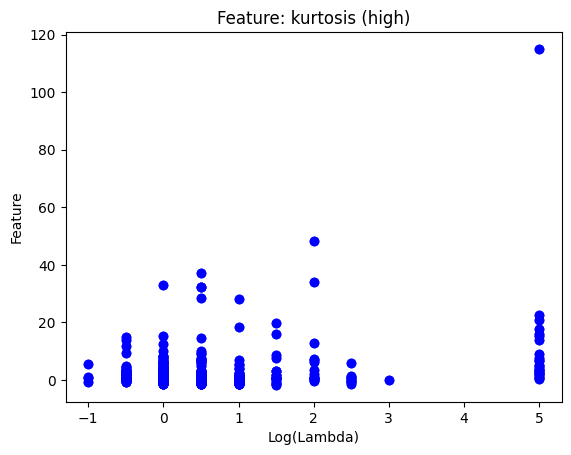

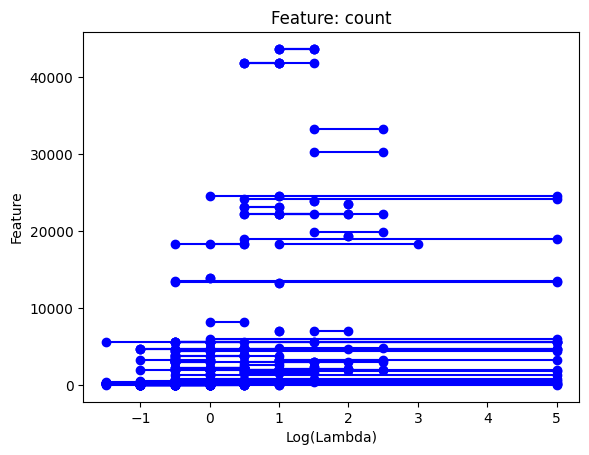

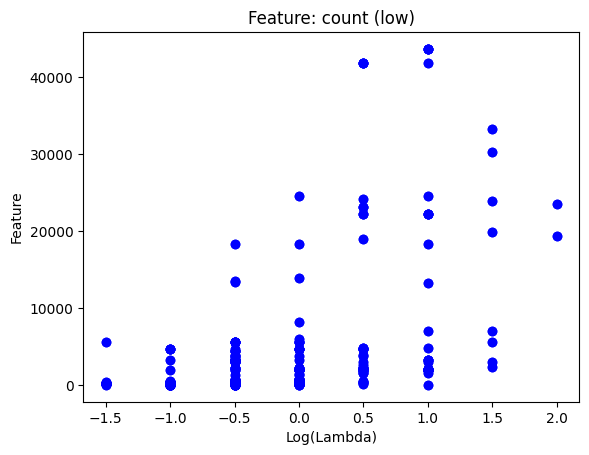

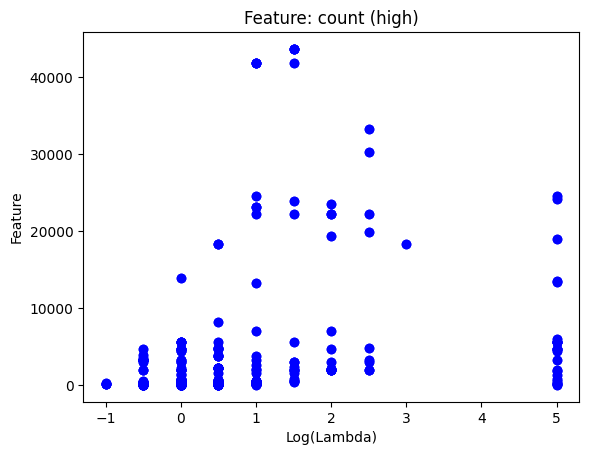

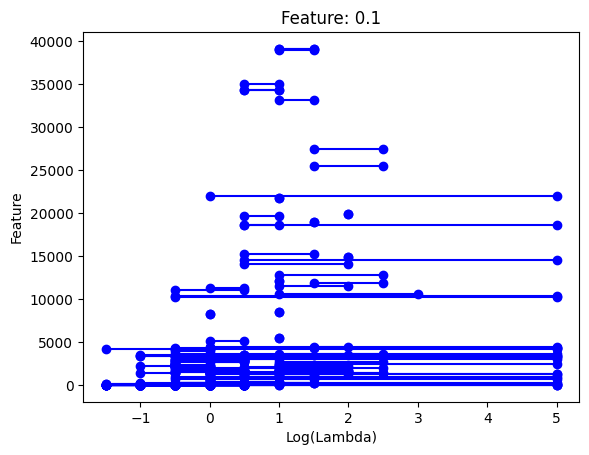

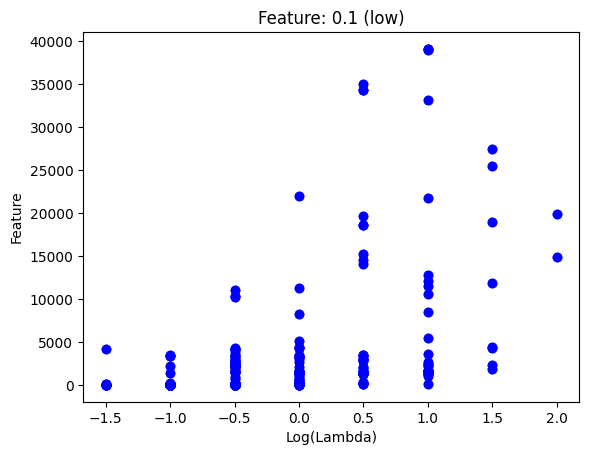

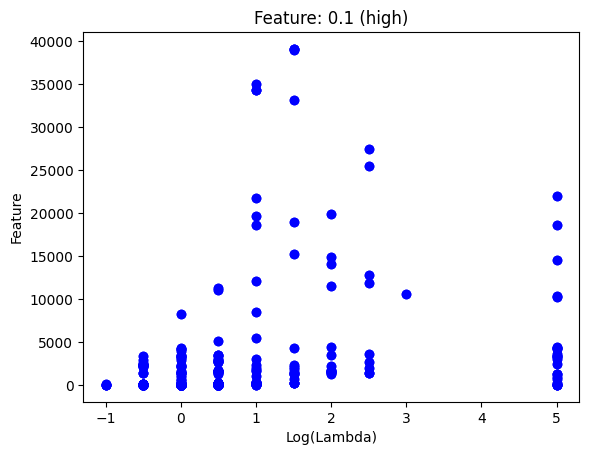

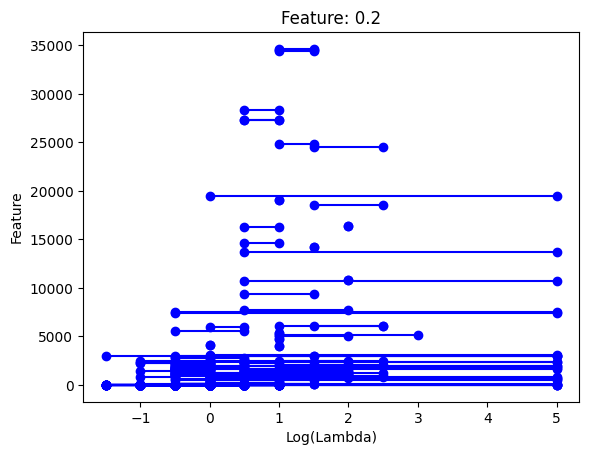

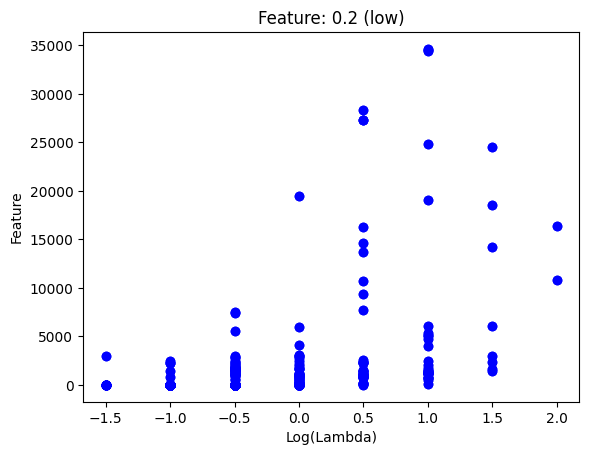

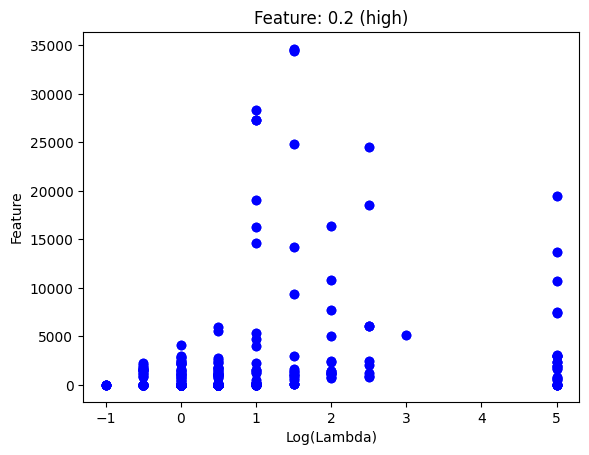

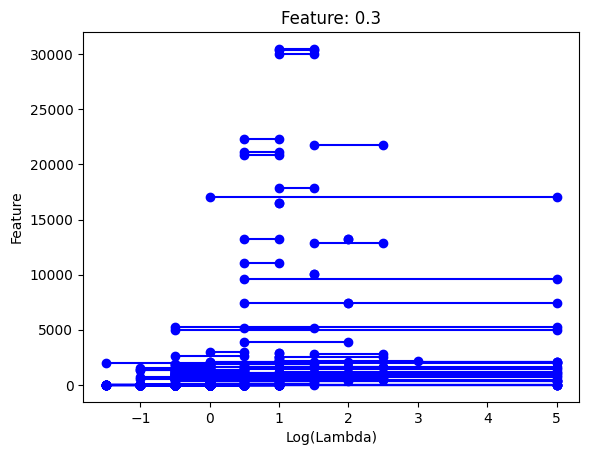

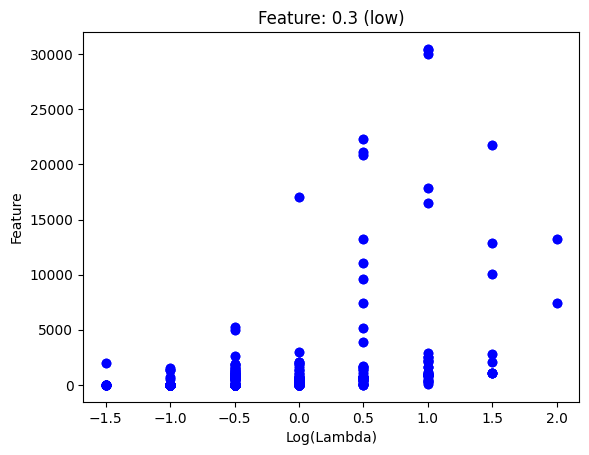

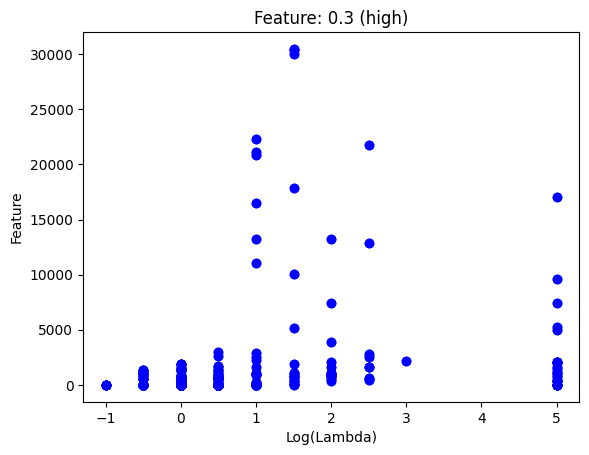

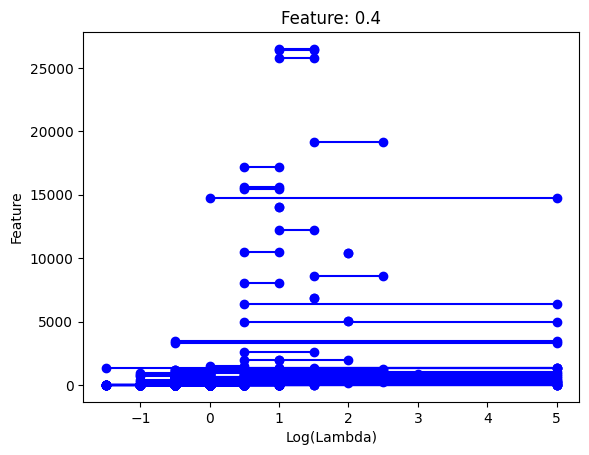

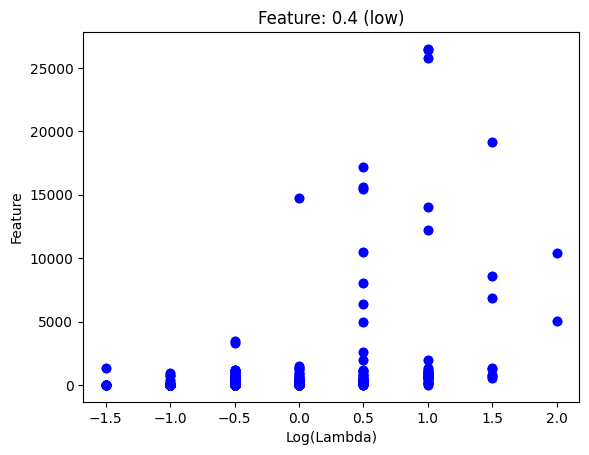

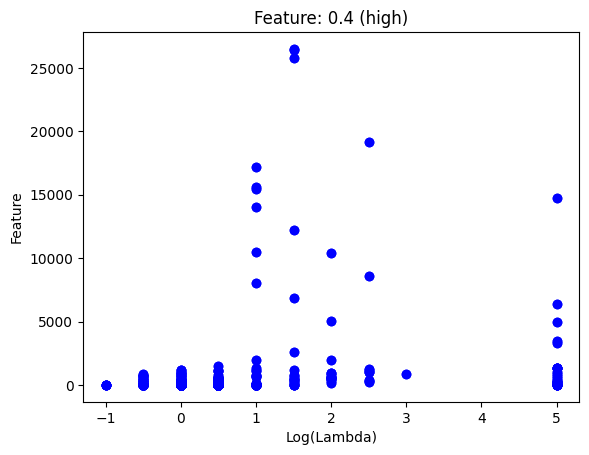

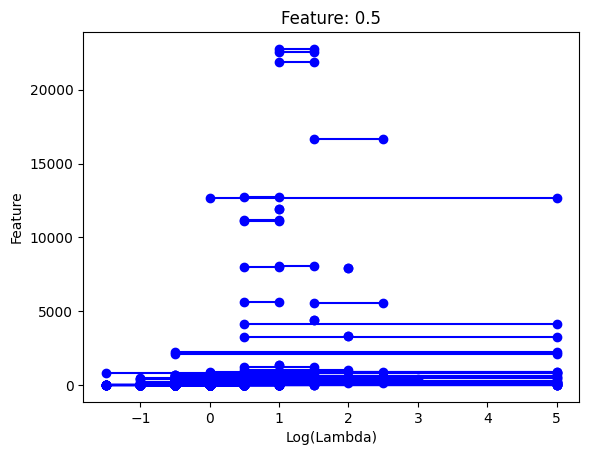

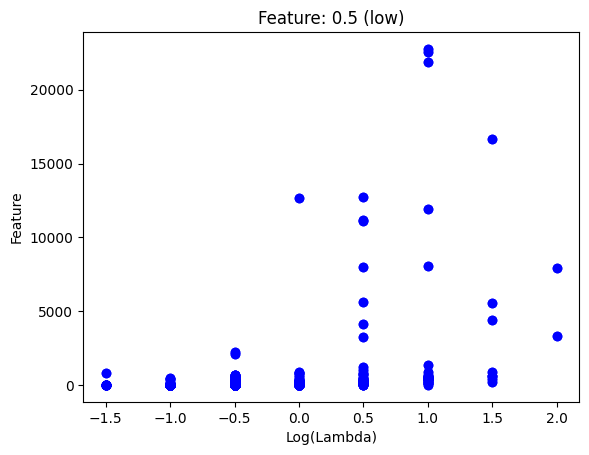

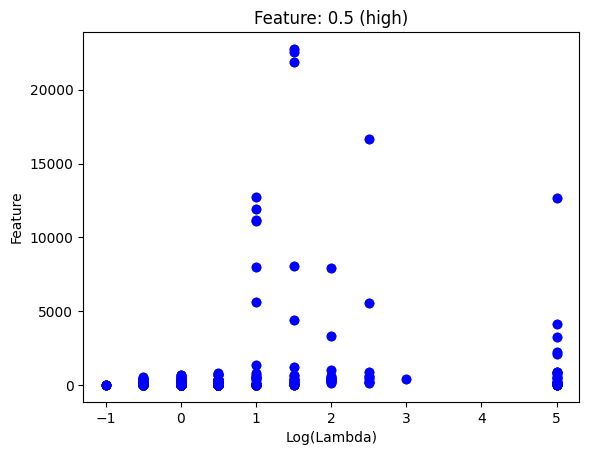

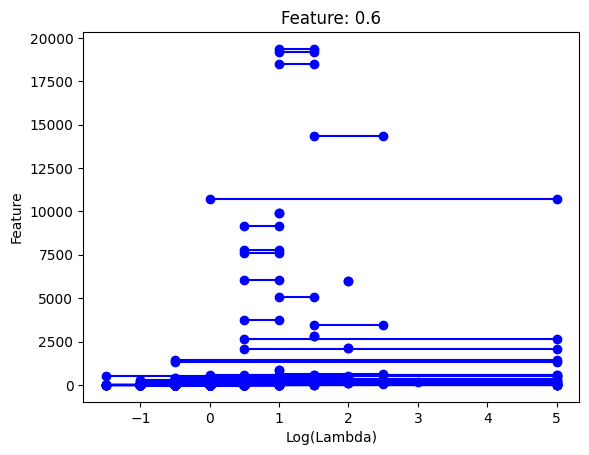

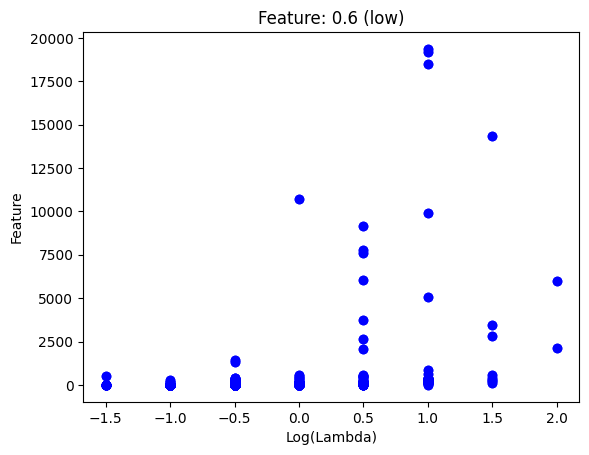

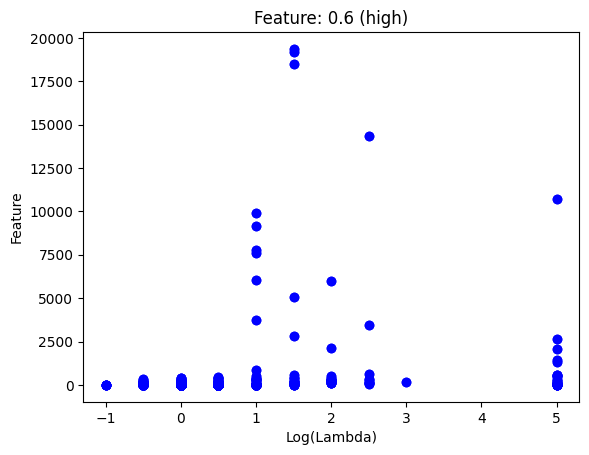

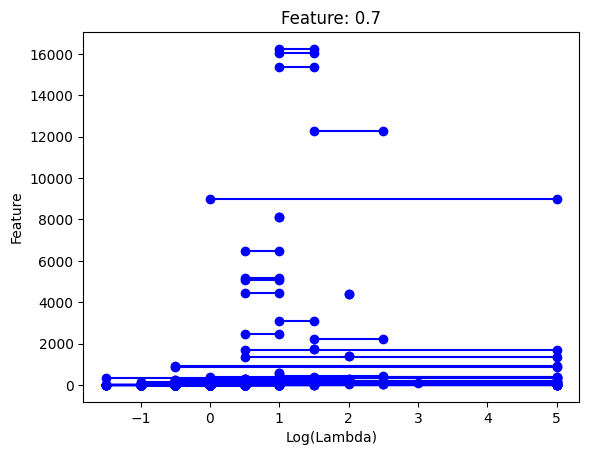

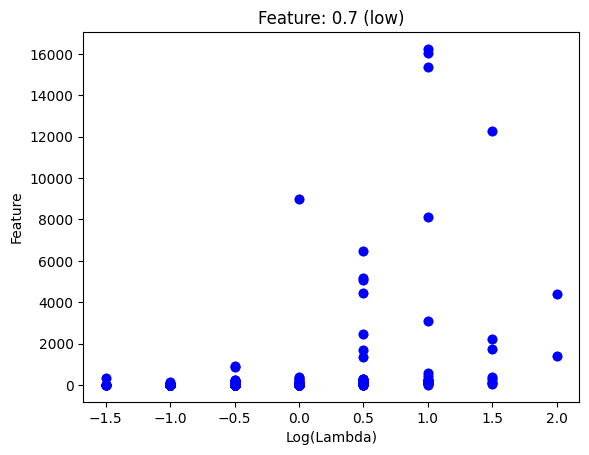

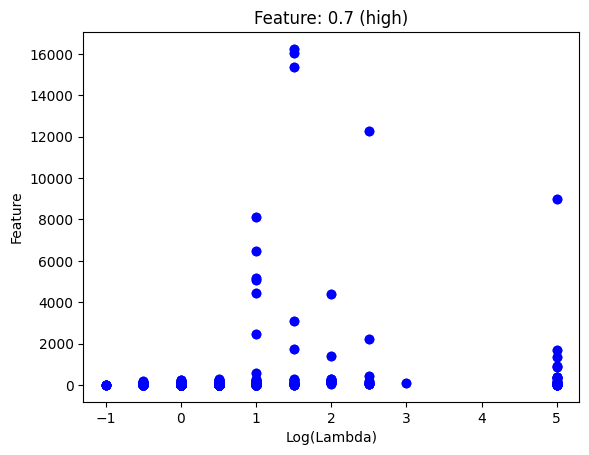

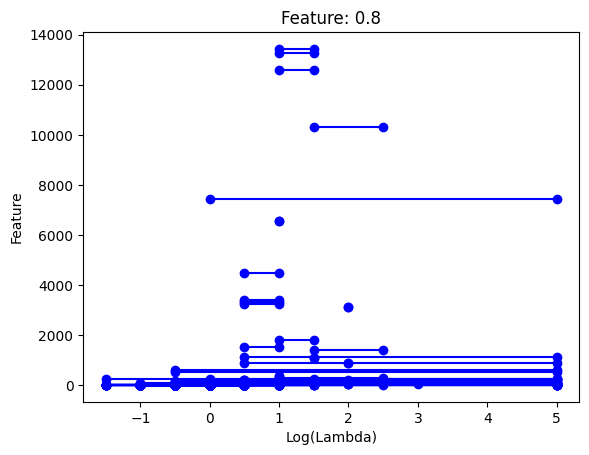

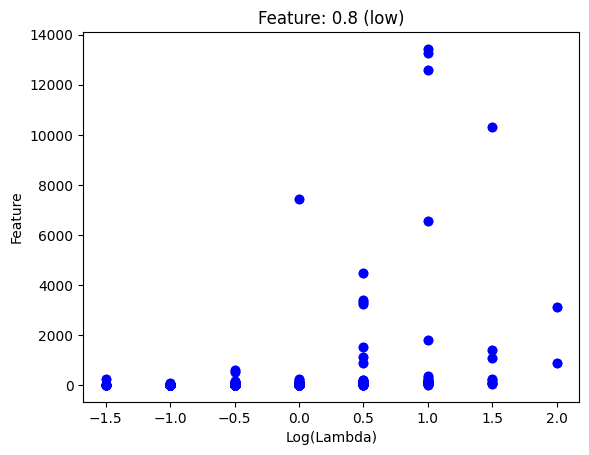

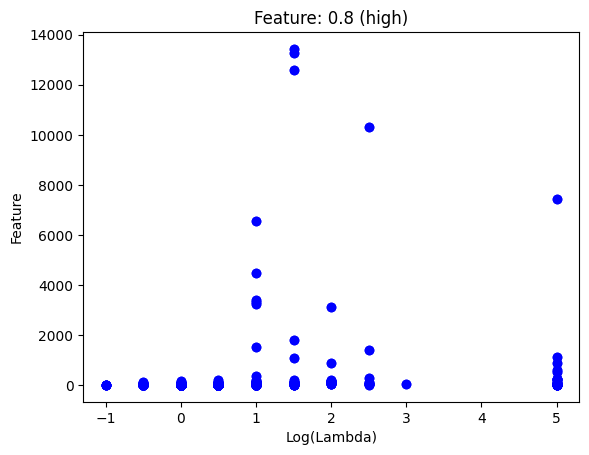

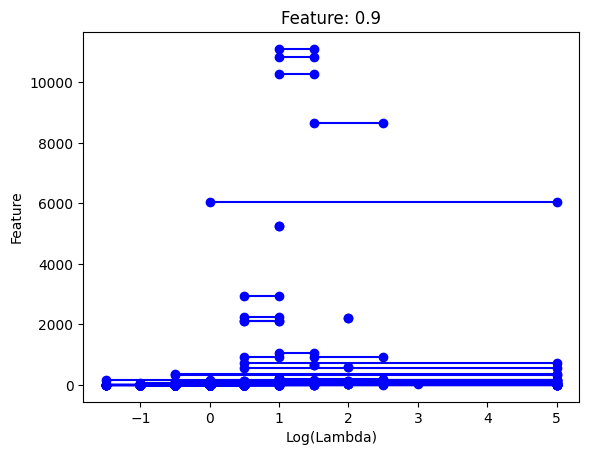

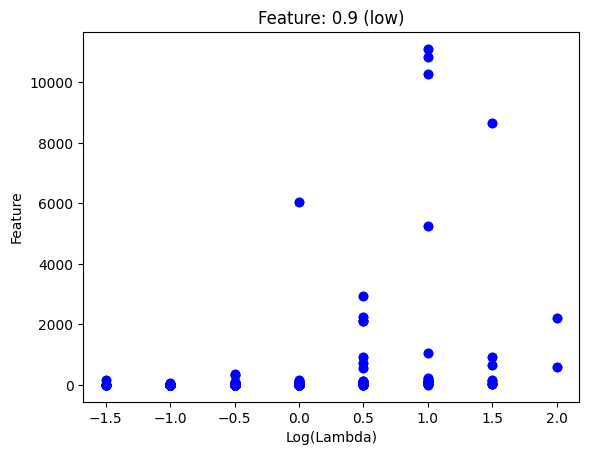

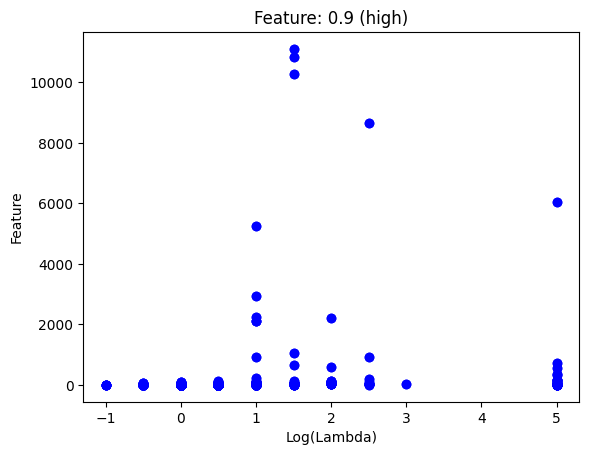

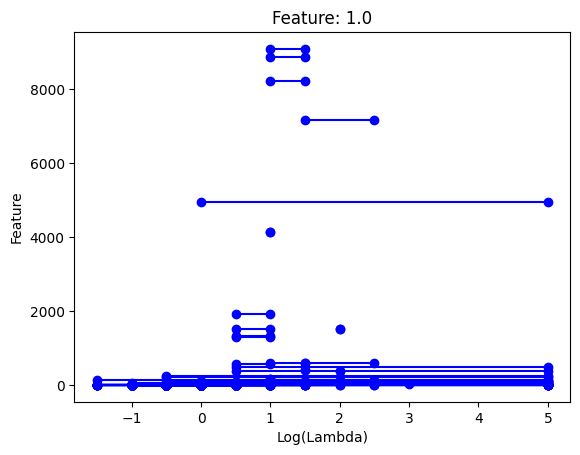

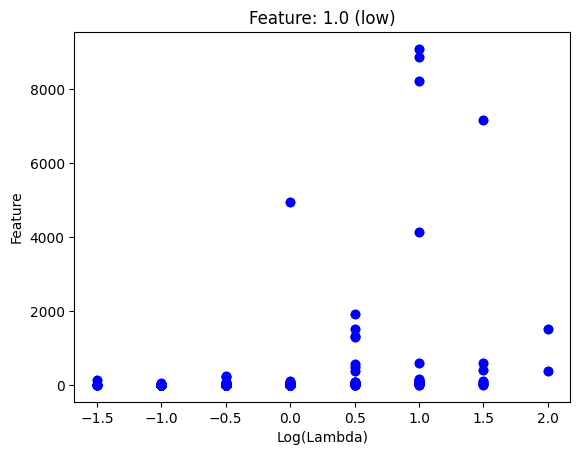

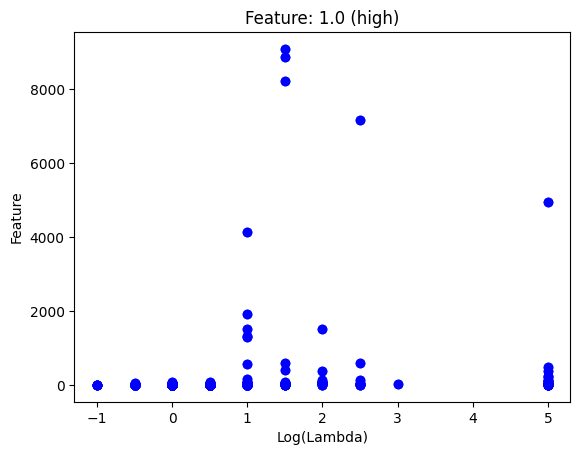

In [7]:
for i in range(1, seq_feature_df.shape[1]):
    y  = seq_feature_df.iloc[:, i].to_numpy()
    plot_feature_targets(y, low, high, seq_feature_df.columns.tolist()[i])
    plot_feature_targets(y, low, low, seq_feature_df.columns.tolist()[i] + " (low)")
    plot_feature_targets(y, high, high, seq_feature_df.columns.tolist()[i] + " (high)")

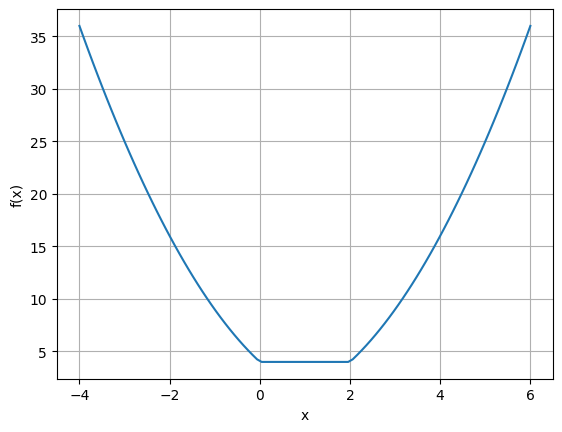

In [11]:
# Define the function f(x) - square hinge
def relu(x):
    return np.maximum(0, x)

def f(x, low, high):
    low  = low + 1
    high = high - 1
    loss = relu(low - x) + relu(x - high)
    return loss**2


# Calculate corresponding y values using the function f(x)
low  = 1
high = 1
x_values = np.linspace(low-5, high+5, 100)
y_values = f(x_values, low, high)

# Plot the graph
plt.plot(x_values, y_values, label='f(x) = x^2')  # You can change the label accordingly
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()